<!-- # Copyright (c) 2025 takotime808 -->
# Regression Prediction Plots: Single & Multi-output with Error Bars

Demonstrates visualization of regression predictions (single and multi-output) including error bars for predicted uncertainties.  
Tested with scikit-learn regressors and mock uncertainty.

---

## Imports & Plotting Functions


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split

from multioutreg.figures.prediction_plots import (
    plot_predictions_with_error_bars,
    plot_predictions,
)


Bad key text.markup in file /Users/tako/.matplotlib/matplotlibrc, line 165 ("text.markup         : 'plain'  # Affects how text, such as titles and labels, are")
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.10.3/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


<!-- # Copyright (c) 2025 takotime808 -->

## Single-output Regression Example
- Standard regression
- Mock uncertainty for error bars


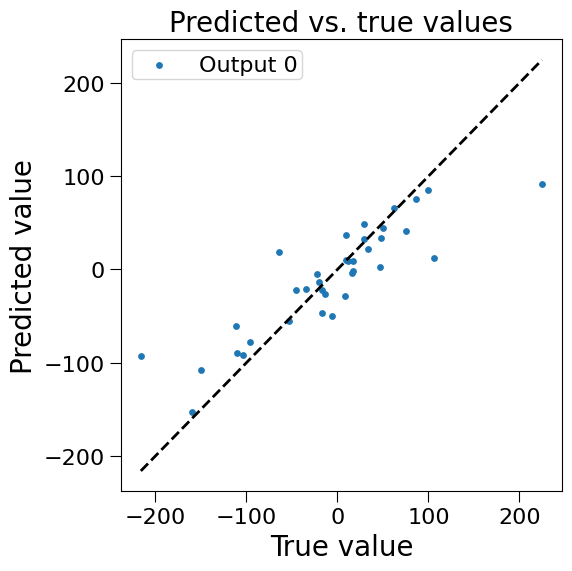

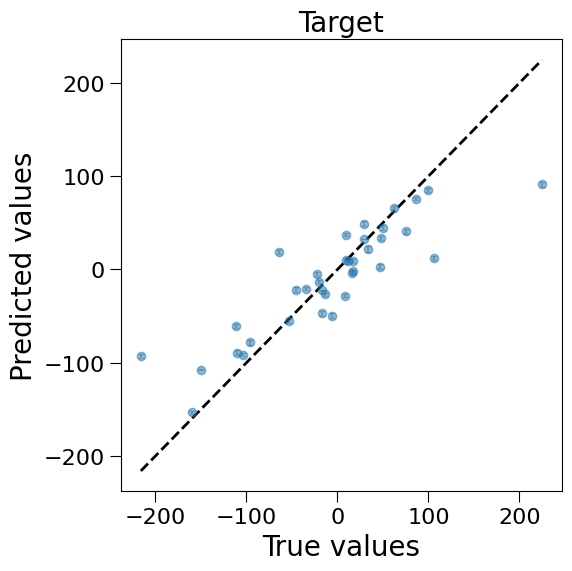

In [2]:
# Generate single-output regression data
X_single, y_single = make_regression(n_samples=120, n_features=4, noise=10.0, random_state=42)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_single, y_single, test_size=0.3, random_state=0)

# Fit model
model_single = RandomForestRegressor(random_state=42)
model_single.fit(X_train_s, y_train_s)

# Plot predictions (scatter)
plot_predictions(model_single, X_test_s, y_test_s)

# Generate mock std for predictions (since sklearn doesn't provide this by default)
y_pred_s = model_single.predict(X_test_s)
y_std_s = np.abs(np.random.normal(2.0, 0.8, size=y_pred_s.shape))  # mock uncertainty

# Plot predictions with error bars
plot_predictions_with_error_bars(y_test_s, y_pred_s, y_std_s, output_names=["Target"])


<!-- # Copyright (c) 2025 takotime808 -->

## Multi-output Regression Example
- Multiple regression targets
- Mock uncertainty for each output


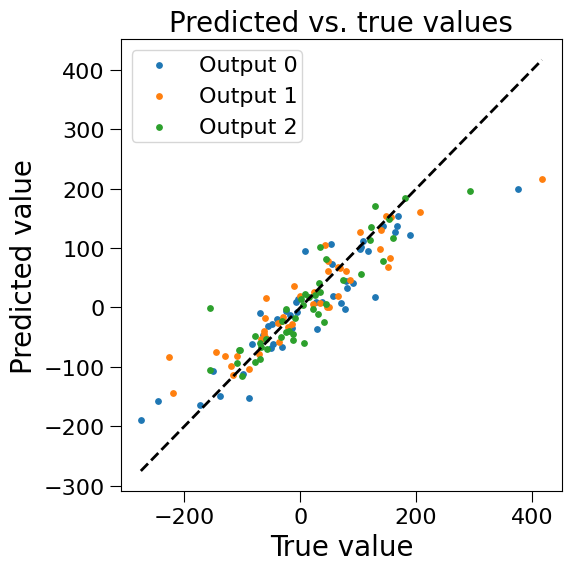

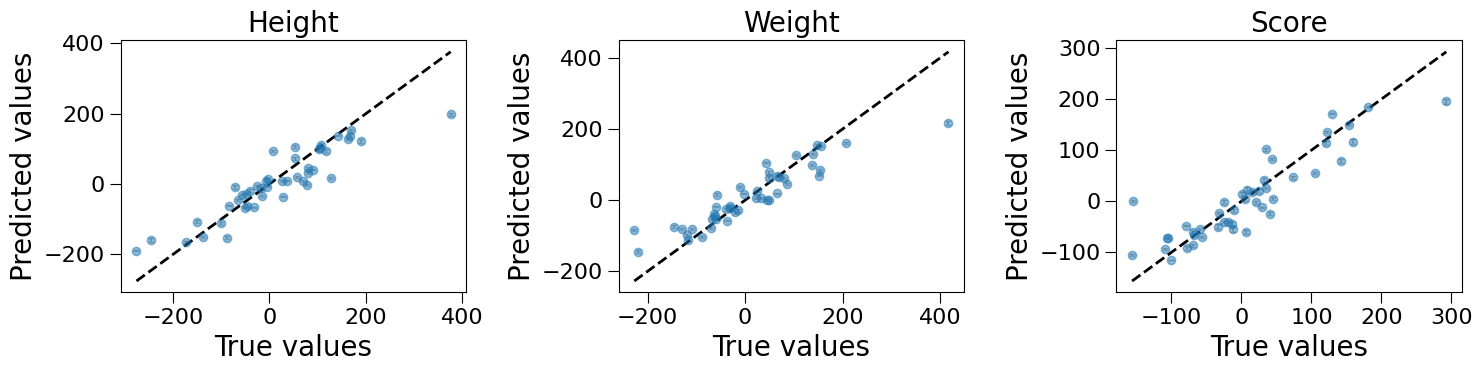

In [3]:
# Generate multi-output regression data
X_multi, y_multi = make_regression(n_samples=150, n_features=4, n_targets=3, noise=15.0, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.3, random_state=0)

# Fit multi-output model
model_multi = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model_multi.fit(X_train_m, y_train_m)

# Plot predictions (scatter)
plot_predictions(model_multi, X_test_m, y_test_m)

# Mock prediction stddevs
y_pred_m = model_multi.predict(X_test_m)
y_std_m = np.abs(np.random.normal(3.0, 1.1, size=y_pred_m.shape))  # mock uncertainty

# Plot predictions with error bars
output_names = ["Height", "Weight", "Score"]
plot_predictions_with_error_bars(y_test_m, y_pred_m, y_std_m, output_names=output_names)


<!-- # Copyright (c) 2025 takotime808 -->

## Errorbars

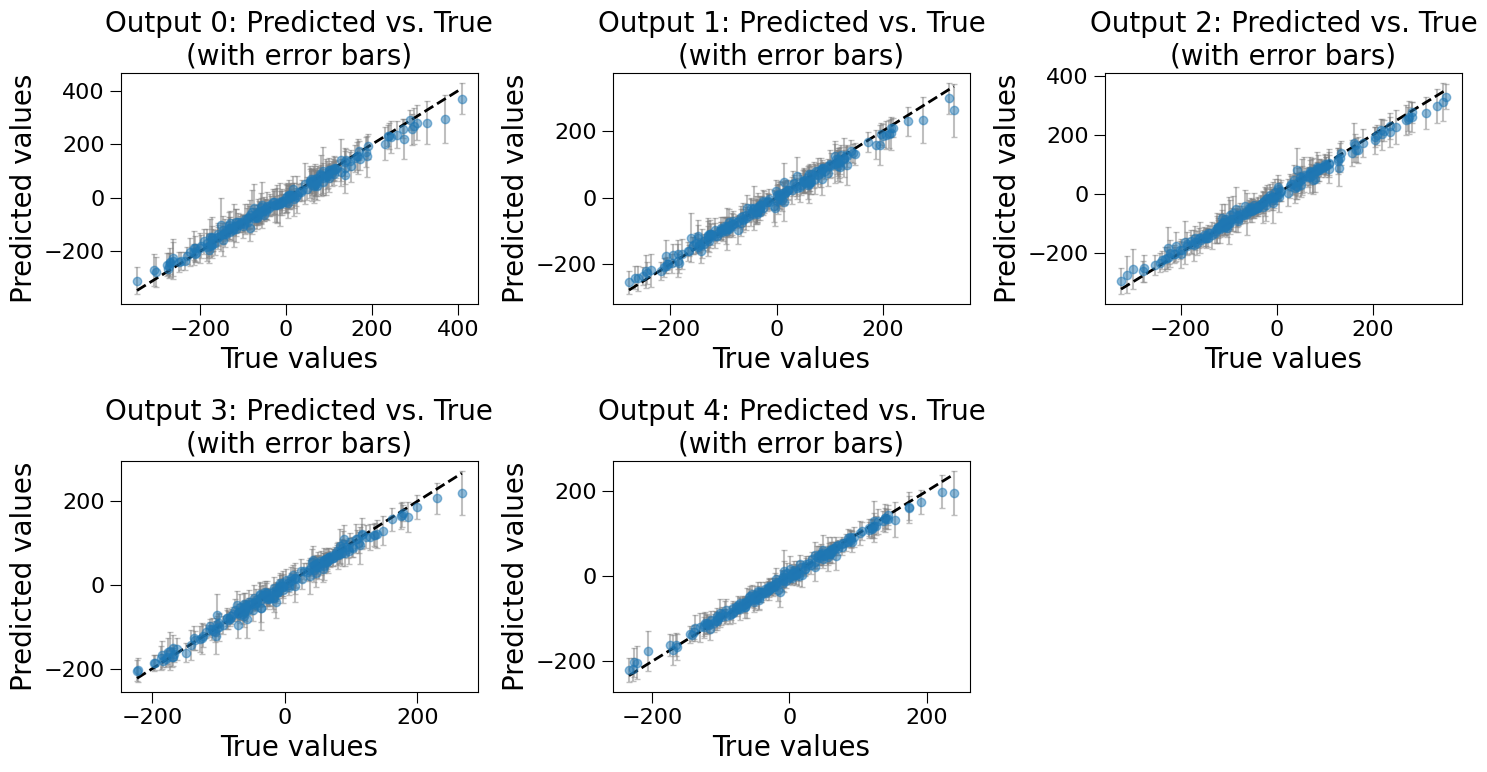

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

def plot_multioutput_predictions_with_error_bars(Y_true, Y_pred, Y_std, n_cols=3):
    """
    Plot predicted vs true values with error bars for multi-output regression.

    Parameters:
    - Y_true: shape (n_samples, n_outputs)
    - Y_pred: shape (n_samples, n_outputs)
    - Y_std:  shape (n_samples, n_outputs) standard deviation of prediction per output
    - n_cols: number of subplot columns (default: 3)
    """
    n_targets = Y_true.shape[1]
    n_rows = int(np.ceil(n_targets / n_cols))
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axs = np.array(axs).reshape(-1)

    for i in range(n_targets):
        axs[i].errorbar(
            Y_true[:, i], Y_pred[:, i], yerr=Y_std[:, i], fmt='o', alpha=0.5, ecolor='gray', capsize=2
        )
        axs[i].plot(
            [Y_true[:, i].min(), Y_true[:, i].max()],
            [Y_true[:, i].min(), Y_true[:, i].max()],
            'k--',
            lw=2
        )
        axs[i].set_xlabel("True values")
        axs[i].set_ylabel("Predicted values")
        axs[i].set_title(f"Output {i}: Predicted vs. True\n(with error bars)")

    for j in range(n_targets, n_rows * n_cols):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# --- Sample usage ---

n_targets = 5
X, Y = make_regression(
    n_samples=200, n_features=4, n_targets=n_targets, noise=0.3, random_state=0
)
regr = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=0))
regr.fit(X, Y)
Y_pred = regr.predict(X)

# Compute std deviation of tree predictions for each sample/output
Y_std = np.zeros_like(Y_pred)
for i, estimator in enumerate(regr.estimators_):
    all_tree_preds = np.array([tree.predict(X) for tree in estimator.estimators_])
    Y_std[:, i] = all_tree_preds.std(axis=0)

# Plot using the function
plot_multioutput_predictions_with_error_bars(Y, Y_pred, Y_std)



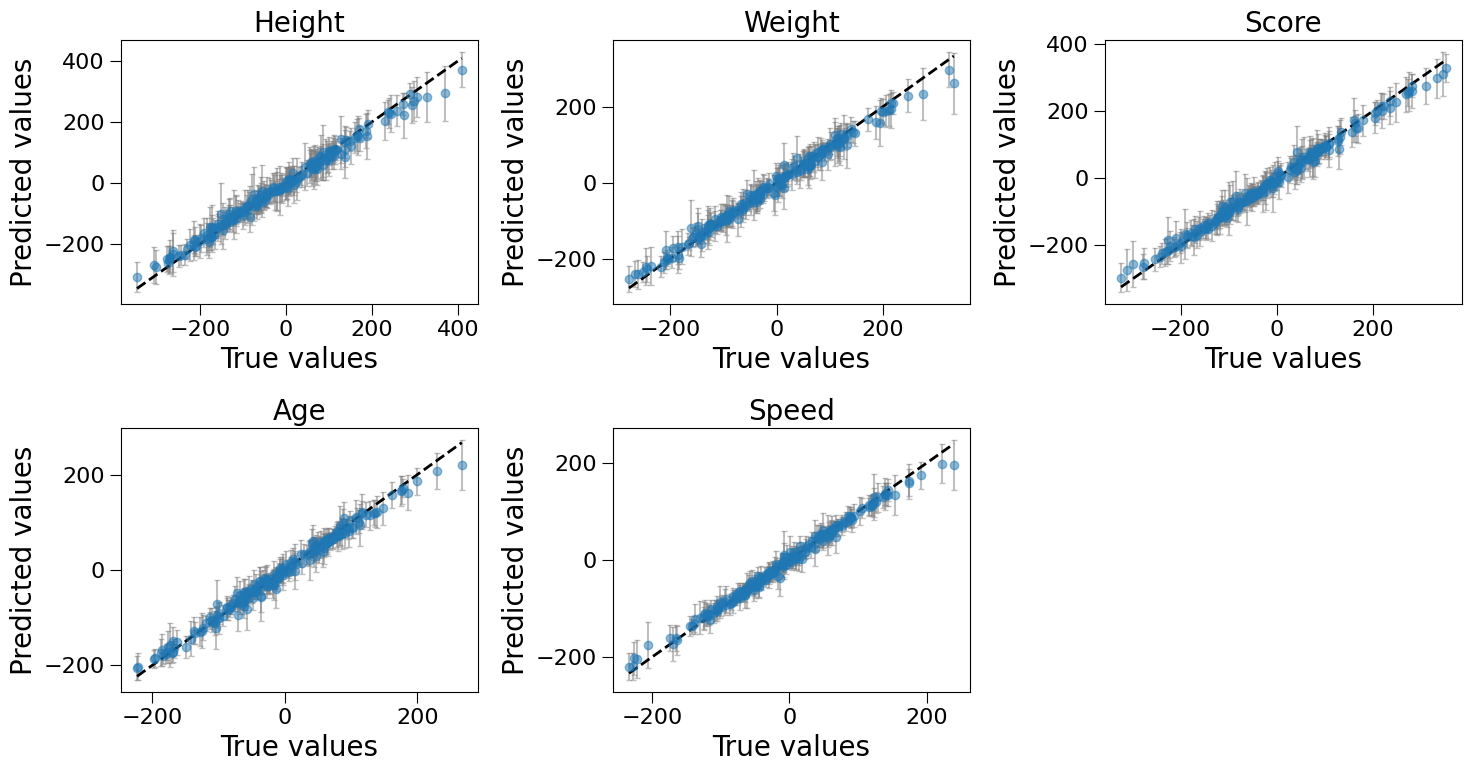

In [5]:
def plot_multioutput_predictions_with_error_bars(Y_true, Y_pred, Y_std, output_names=None, n_cols=3):
    """
    Plot predicted vs true values with error bars for multi-output regression.

    Parameters:
    - Y_true: shape (n_samples, n_outputs)
    - Y_pred: shape (n_samples, n_outputs)
    - Y_std:  shape (n_samples, n_outputs) standard deviation of prediction per output
    - output_names: list of names for output variables (optional)
    - n_cols: number of subplot columns (default: 3)
    """
    n_targets = Y_true.shape[1]
    n_rows = int(np.ceil(n_targets / n_cols))
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axs = np.array(axs).reshape(-1)

    # Use provided names or default
    if output_names is None:
        output_names = [f"Output {i}" for i in range(n_targets)]

    for i in range(n_targets):
        axs[i].errorbar(
            Y_true[:, i], Y_pred[:, i], yerr=Y_std[:, i], fmt='o', alpha=0.5, ecolor='gray', capsize=2
        )
        axs[i].plot(
            [Y_true[:, i].min(), Y_true[:, i].max()],
            [Y_true[:, i].min(), Y_true[:, i].max()],
            'k--',
            lw=2
        )
        axs[i].set_xlabel("True values")
        axs[i].set_ylabel("Predicted values")
        axs[i].set_title(output_names[i])

    for j in range(n_targets, n_rows * n_cols):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Use the same regression problem from above
output_names = ["Height", "Weight", "Score", "Age", "Speed"]

plot_multioutput_predictions_with_error_bars(Y, Y_pred, Y_std, output_names)

